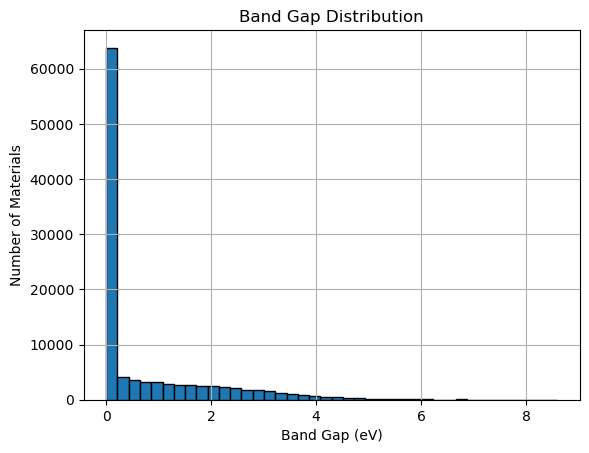

In [1]:
#Band Gap Distribution across all materials
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("Materials_With_AtLeast_OneMagneticElement.csv")


df["band_gap"].hist(bins=40, edgecolor='black')
plt.xlabel("Band Gap (eV)")
plt.ylabel("Number of Materials")
plt.title("Band Gap Distribution")
plt.show()

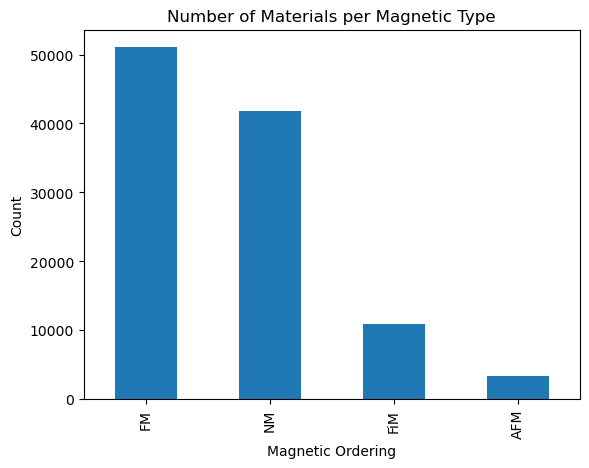

In [2]:
df["ordering"].value_counts().plot(kind="bar")
plt.xlabel("Magnetic Ordering")
plt.ylabel("Count")
plt.title("Number of Materials per Magnetic Type")
plt.show()


C:\Users\AhmedFahmy\AppData\Local\Temp\ipykernel_7276\1072677899.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


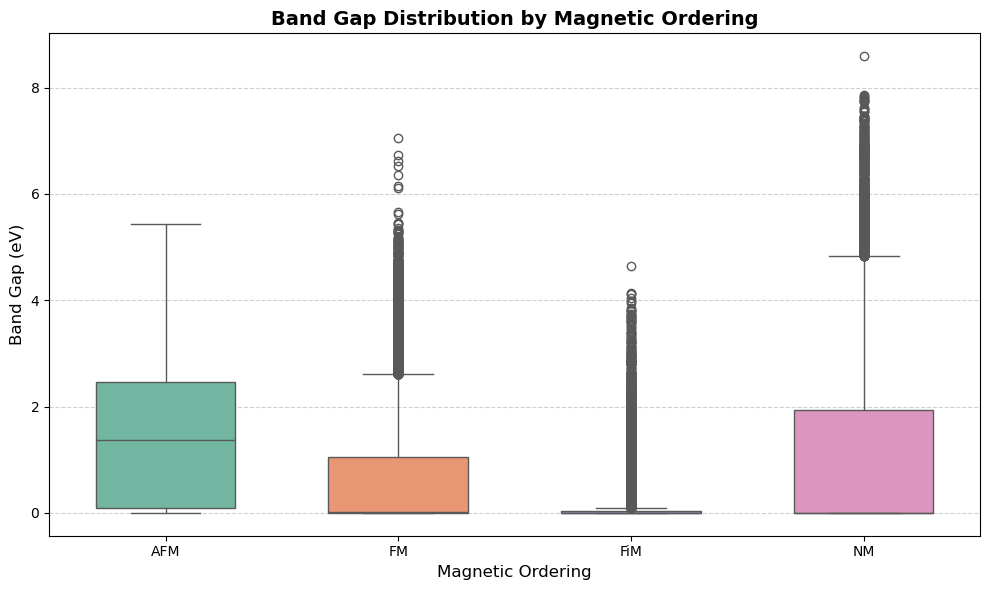

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Sorted order of classes by median band gap (optional)
order = df.groupby("ordering")["band_gap"].median().sort_values(ascending=False).index

sns.boxplot(
    data=df,
    x="ordering",
    y="band_gap",
    order=order,
    palette="Set2",              # Soft color palette
    showfliers=True,            # Hide outliers to reduce clutter
    width=0.6                    # Make boxes narrower for clarity
)

# Titles and labels
plt.title("Band Gap Distribution by Magnetic Ordering", fontsize=14, weight='bold')
plt.xlabel("Magnetic Ordering", fontsize=12)
plt.ylabel("Band Gap (eV)", fontsize=12)

# Optional: add grid
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


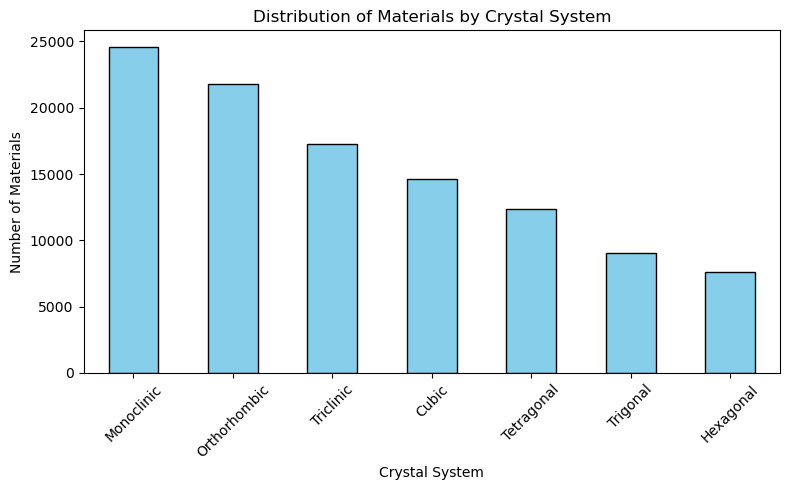

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import re



# Correct crystal system parser
def extract_crystal_system(symmetry_str):
    if pd.isna(symmetry_str):
        return "Unknown"
    match = re.search(r"crystal_system=<CrystalSystem\.\w+: '(\w+)'", str(symmetry_str))
    return match.group(1) if match else "Unknown"

# Apply extraction
df["crystal_system"] = df["symmetry"].apply(extract_crystal_system)

# Count and plot
counts = df["crystal_system"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Materials by Crystal System")
plt.xlabel("Crystal System")
plt.ylabel("Number of Materials")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

